# Basics of Image Segmentation

In [1]:
# %pip install opencv-python


## Region Based Segmentation
One simple way to segment different objects could be to use their pixel values. An important point to note – the pixel values will be different for the objects and the image’s background if there’s a sharp contrast between them.

In this case, we can set a threshold value. The pixel values falling below or above that threshold can be classified accordingly (as an object or the background). This technique is known as Threshold Segmentation.

If we want to divide the image into two regions (object and background), we define a single threshold value. This is known as the **global threshold**.
If we have multiple objects along with the background, we must define multiple thresholds. These thresholds are collectively known as the **local threshold**.

In [2]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(192, 263, 3)


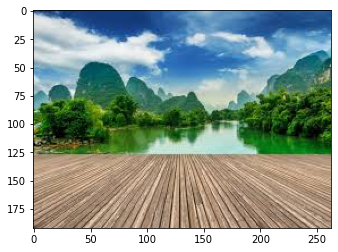

In [3]:
image = plt.imread('1.jpeg')
print(image.shape)
plt.imshow(image)

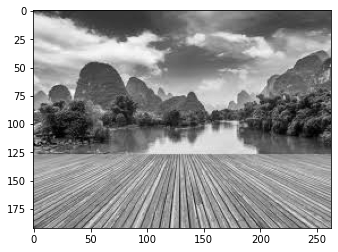

In [4]:
gray=rgb2gray(image)
# cv2.imshow('img',gray) # name of window 'img'

plt.imshow(gray, cmap='gray')
# cv2.waitKey(0) # User to press any key to avoid Pyton crashing
# cv2.destroyAllWindows() # Close other windows 

In [5]:
print(gray.shape)

(192, 263)


 We will take the mean of the pixel values and use that as a threshold. If the pixel value is more than our threshold, we can say that it belongs to an object. If the pixel value is less than the threshold, it will be treated as the background.

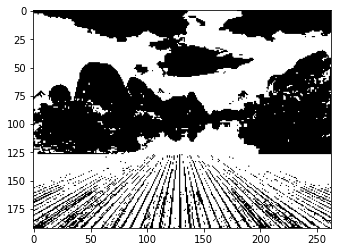

In [6]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1]) # Flatten the image to find the mean
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean(): # Create the mask conditions
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1]) # Reshape the masked image to original shape
plt.imshow(gray, cmap='gray')

The darker region (black) represents the background and the brighter (white) region is the foreground. We can define multiple thresholds as well to detect multiple objects:

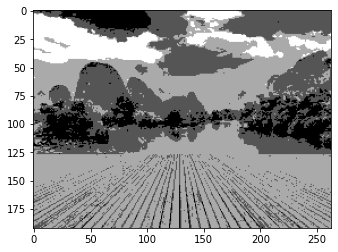

In [7]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1]) # Flatten the image
for i in range(gray_r.shape[0]): # We create mask for 4 classes
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1]) # Reshape masked image to original shape
# plt.imshow(gray, cmap='gray')
plt.imshow(gray, cmap='gray')


In [8]:
image_r = image.reshape(image.shape[0]*image.shape[1]*image.shape[2]) # Flatten the image
# print(image_r.shape)
# print(image_r.mean())
# print(image_r.max())
# print(image_r.min())

# for i in range(image_r.shape[0]): # We create mask for 4 classes
#     if image_r[i] < image_r.mean():
#         image_r[i] = 1
# #     elif image_r[i] > 0.5:
# #         image_r[i] = 2
# #     elif image_r[i] > 0.25:
# #         image_r[i] = 1
#     else:
#         image_r[i] = 0
# image = image_r.reshape(image.shape[0],image.shape[1], image.shape[2]) # Reshape masked image to original shape
# print(image.shape)
# plt.imshow(image, cmap='viridis')

There are four different segments in the above image. You can set different threshold values and check how the segments are made. Some of the advantages of this method are:

Calculations are simpler
- Fast operation speed
- When the object and background have high contrast, this method performs really well
- But there are some limitations to this approach. When we don’t have significant grayscale difference, or there is an overlap of the grayscale pixel values, it becomes very difficult to get accurate segments.

## Edge Detection Segmentation
What divides two objects in an image? There is always an edge between two adjacent regions with different grayscale values (pixel values). The edges can be considered as the discontinuous local features of an image.

We can make use of this discontinuity to detect edges and hence define a boundary of the object. This helps us in detecting the shapes of multiple objects present in a given image. Now the question is how can we detect these edges? This is where we can make use of filters and convolutions.

Here’s the step-by-step process of how this works:

-Take the weight matrix
- Put it on top of the image
- Perform element-wise multiplication and get the output
- Move the weight matrix as per the stride chosen
- Convolve until all the pixels of the input are used
The values of the weight matrix define the output of the convolution.

Researchers have found that choosing some specific values for these weight matrices helps us to detect horizontal or vertical edges (or even the combination of horizontal and vertical edges).

One such weight matrix is the sobel operator. It is typically used to detect edges. The sobel operator has two weight matrices – one for detecting horizontal edges and the other for detecting vertical edges. Let me show how these operators look and we will then implement them in Python.

Sobel filter (horizontal) =

1	2	1
0	0	0
-1	-2	-1
 

Sobel filter (vertical) =

-1	0	1
-2	0	2
-1	0	1

Edge detection works by convolving these filters over the given image.

(225, 225, 3)


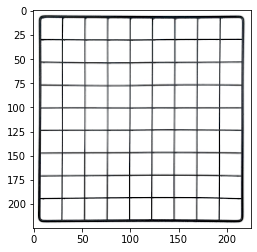

In [10]:
chequer = plt.imread('index.png')
print(chequer.shape)
plt.imshow(chequer)

It should be fairly simple for us to understand how the edges are detected in this image. Let’s convert it into grayscale and define the sobel filter (both horizontal and vertical) that will be convolved over this image:

In [11]:
# converting to grayscale
gray_chequer = rgb2gray(chequer)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


Now, convolve this filter over the image using the convolve function of the ndimage package from scipy.

In [12]:
out_h = ndimage.convolve(gray_chequer, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray_chequer, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

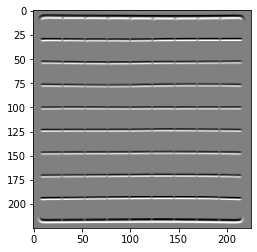

In [13]:
plt.imshow(out_h, cmap='gray')

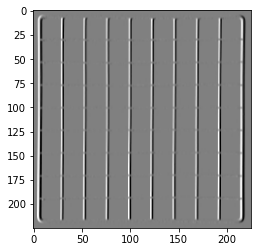

In [14]:
plt.imshow(out_v, cmap='gray')

In [18]:
# On the original image
out_h_image = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v_image = ndimage.convolve(gray, sobel_vertical, mode='reflect')

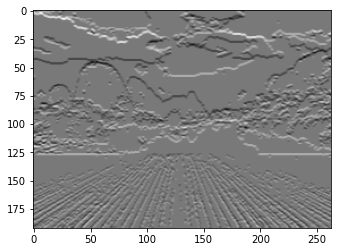

In [19]:
plt.imshow(out_h_image, cmap='gray')

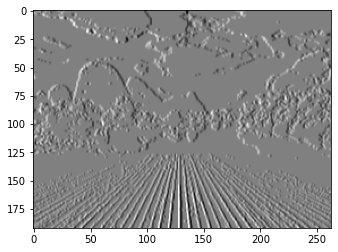

In [20]:
plt.imshow(out_v_image, cmap='gray')

Here, we are able to identify the horizontal as well as the vertical edges. There is one more type of filter that can detect both horizontal and vertical edges at the same time. This is called the laplace operator:

1	1	1
1	-8	1
1	1	1
 

Let’s define this filter in Python and convolve it on thechquer and original images:

In [21]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


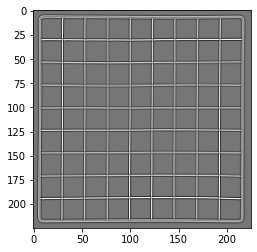

In [22]:
# apply on chequer image
out_l_chequer = ndimage.convolve(gray_chequer, kernel_laplace, mode='reflect')
plt.imshow(out_l_chequer, cmap='gray')

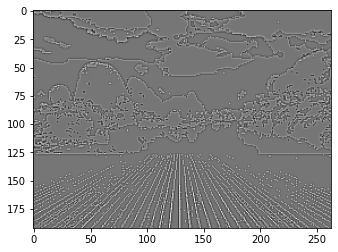

In [23]:
# apply on original image
out_l_image = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l_image, cmap='gray')

Image Segmentation based on Clustering
This idea might have come to you while reading about image segmentation. Can’t we use clustering techniques to divide images into segments? We certainly can!

In this section, we’ll get an an intuition of what clustering is (it’s always good to revise certain concepts!) and how we can use of it to segment images.

Clustering is the task of dividing the population (data points) into a number of groups, such that data points in the same groups are more similar to other data points in that same group than those in other groups. These groups are known as clusters.

One of the most commonly used clustering algorithms is k-means. Here, the k represents the number of clusters (not to be confused with k-nearest neighbor). Let’s understand how k-means works:

- First, randomly select k initial clusters
- Randomly assign each data point to any one of the k clusters
- Calculate the centers of these clusters
- Calculate the distance of all the points from the center of each cluster
- Depending on this distance, the points are reassigned to the nearest cluster
- Calculate the center of the newly formed clusters
- Finally, repeat steps (4), (5) and (6) until either the center of the clusters does not change or we reach the set number of iterations
- The key advantage of using k-means algorithm is that it is simple and easy to understand. We are assigning the points to the clusters which are closest to them.



(192, 263, 3)


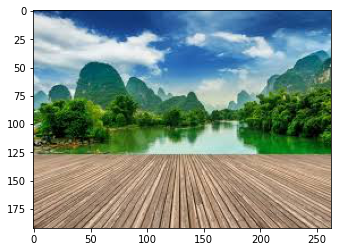

In [24]:
pic = plt.imread('1.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

It’s a 3-dimensional image of shape (192, 263, 3). For clustering the image using k-means, we first need to convert it into a 2-dimensional array whose shape will be (length*width, channels). In our example, this will be (192*263, 3).

In [25]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(50496, 3)

We can see that the image has been converted to a 2-dimensional array. Next, fit the k-means algorithm on this reshaped array and obtain the clusters. The cluster_centers_ function of k-means will return the cluster centers and labels_ function will give us the label for each pixel (it will tell us which pixel of the image belongs to which cluster).

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(pic_n) # We have chosen 7 clusters
pic2show = kmeans.cluster_centers_[kmeans.labels_]

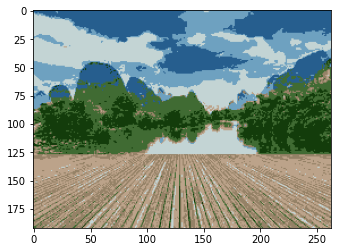

In [34]:
# Return to original shape
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

We are able to segment the image pretty well using just 5 clusters. I

k-means works really well when we have a small dataset. It can segment the objects in the image and give impressive results. But the algorithm hits a roadblock when applied on a large dataset (more number of images).

It looks at all the samples at every iteration, so the time taken is too high. Hence, it’s also too expensive to implement. And since k-means is a distance-based algorithm, it is only applicable to convex datasets and is not suitable for clustering non-convex clusters.

## Mask R-CNN
Data scientists and researchers at Facebook AI Research (FAIR) pioneered a deep learning architecture, called Mask R-CNN, that can create a pixel-wise mask for each object in an image. 
Mask R-CNN is an extension of the popular Faster R-CNN object detection architecture. Mask R-CNN adds a branch to the already existing Faster R-CNN outputs. The Faster R-CNN method generates two things for each object in the image:

- Its class
- The bounding box coordinates
Mask R-CNN adds a third branch to this which outputs the object mask as well. 

- We take an image as input and pass it to the ConvNet, which returns the feature map for that image
- Region proposal network (RPN) is applied on these feature maps. This returns the object proposals along with their objectness score
- A RoI pooling layer is applied on these proposals to bring down all the proposals to the same size
- Finally, the proposals are passed to a fully connected layer to classify and output the bounding boxes for objects. It also returns the mask for each proposal

### Summary of Image Segmentation Techniques


**Region-Based Segmentation**	Separates the objects into different regions based on some threshold value(s).	a. Simple calculations
b. Fast operation speed

c. When the object and background have high contrast, this method performs really well

When there is no significant grayscale difference or an overlap of the grayscale pixel values, it becomes very difficult to get accurate segments.
**Edge Detection Segmentation**	Makes use of discontinuous local features of an image to detect edges and hence define a boundary of the object.	It is good for images having better contrast between objects.	Not suitable when there are too many edges in the image and if there is less contrast between objects.
Segmentation based on Clustering	Divides the pixels of the image into homogeneous clusters.	Works really well on small datasets and generates excellent clusters.	a. Computation time is too large and expensive.
b. k-means is a distance-based algorithm. It is not suitable for clustering non-convex clusters.

**Mask R-CNN**	Gives three outputs for each object in the image: its class, bounding box coordinates, and object mask	a. Simple, flexible and general approach
b. It is also the current state-of-the-art for image segmentation

High training time